In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns

In [2]:
# importing the csv data

df = pd.read_csv('datasets/fifa21_raw_data.csv', low_memory=False)
df.columns = [col.strip() for col in df.columns]
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [3]:
# Lets see all the columns
pd.set_option('display.max_columns', None)
# And also lets drop the duplicate rows
df.drop_duplicates(inplace=True)
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18978 non-null  object
 1   LongName          18978 non-null  object
 2   playerUrl         18978 non-null  object
 3   Nationality       18978 non-null  object
 4   Positions         18978 non-null  object
 5   Name              18978 non-null  object
 6   Age               18978 non-null  int64 
 7   ↓OVA              18978 non-null  int64 
 8   POT               18978 non-null  int64 
 9   Team & Contract   18978 non-null  object
 10  ID                18978 non-null  int64 
 11  Height            18978 non-null  object
 12  Weight            18978 non-null  object
 13  foot              18978 non-null  object
 14  BOV               18978 non-null  int64 
 15  BP                18978 non-null  object
 16  Growth            18978 non-null  int64 
 17  Joined           

In [5]:
df.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000,18978.000000
mean,25.194225,65.718042,71.135789,226403.457477,66.751080,5.417747,248.935610,49.687375,45.842871,51.941459,58.767257,42.696649,256.476921,55.586890,47.246654,42.391401,52.724207,58.527769,317.716830,64.357256,64.412372,63.366424,61.654811,63.925967,296.604068,57.801823,64.576720,62.653494,64.786542,46.785488,254.196754,55.590052,46.392823,50.298872,53.856676,48.058331,58.072821,139.904258,46.557540,47.703920,45.642797,81.437928,16.416482,16.207345,16.076826,16.217620,16.519654,1595.272368,355.699652,67.453683,53.457582,57.680472,62.874750,49.864738,64.368427
std,4.710618,6.968701,6.114189,27141.767404,6.746785,5.663967,74.300567,18.131089,19.567492,17.293983,14.519010,17.647391,78.652039,18.761625,18.208222,17.228317,15.177689,16.566119,55.879931,14.890317,14.638927,14.596604,9.071669,14.062648,50.733489,13.309082,11.844838,15.804494,12.488891,19.301012,64.595999,17.140023,20.697352,19.429209,13.708807,15.656302,12.078875,61.217193,20.138562,21.366967,20.921400,84.667639,17.554639,16.816720,16.491458,17.002582,17.854549,269.874424,40.760683,10.678065,13.827581,10.081845,9.927607,16.442378,9.601882
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210134.500000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.250000,44.000000,25.000000,40.000000,45.000000,39.000000,50.000000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232421.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,6

<Axes: >

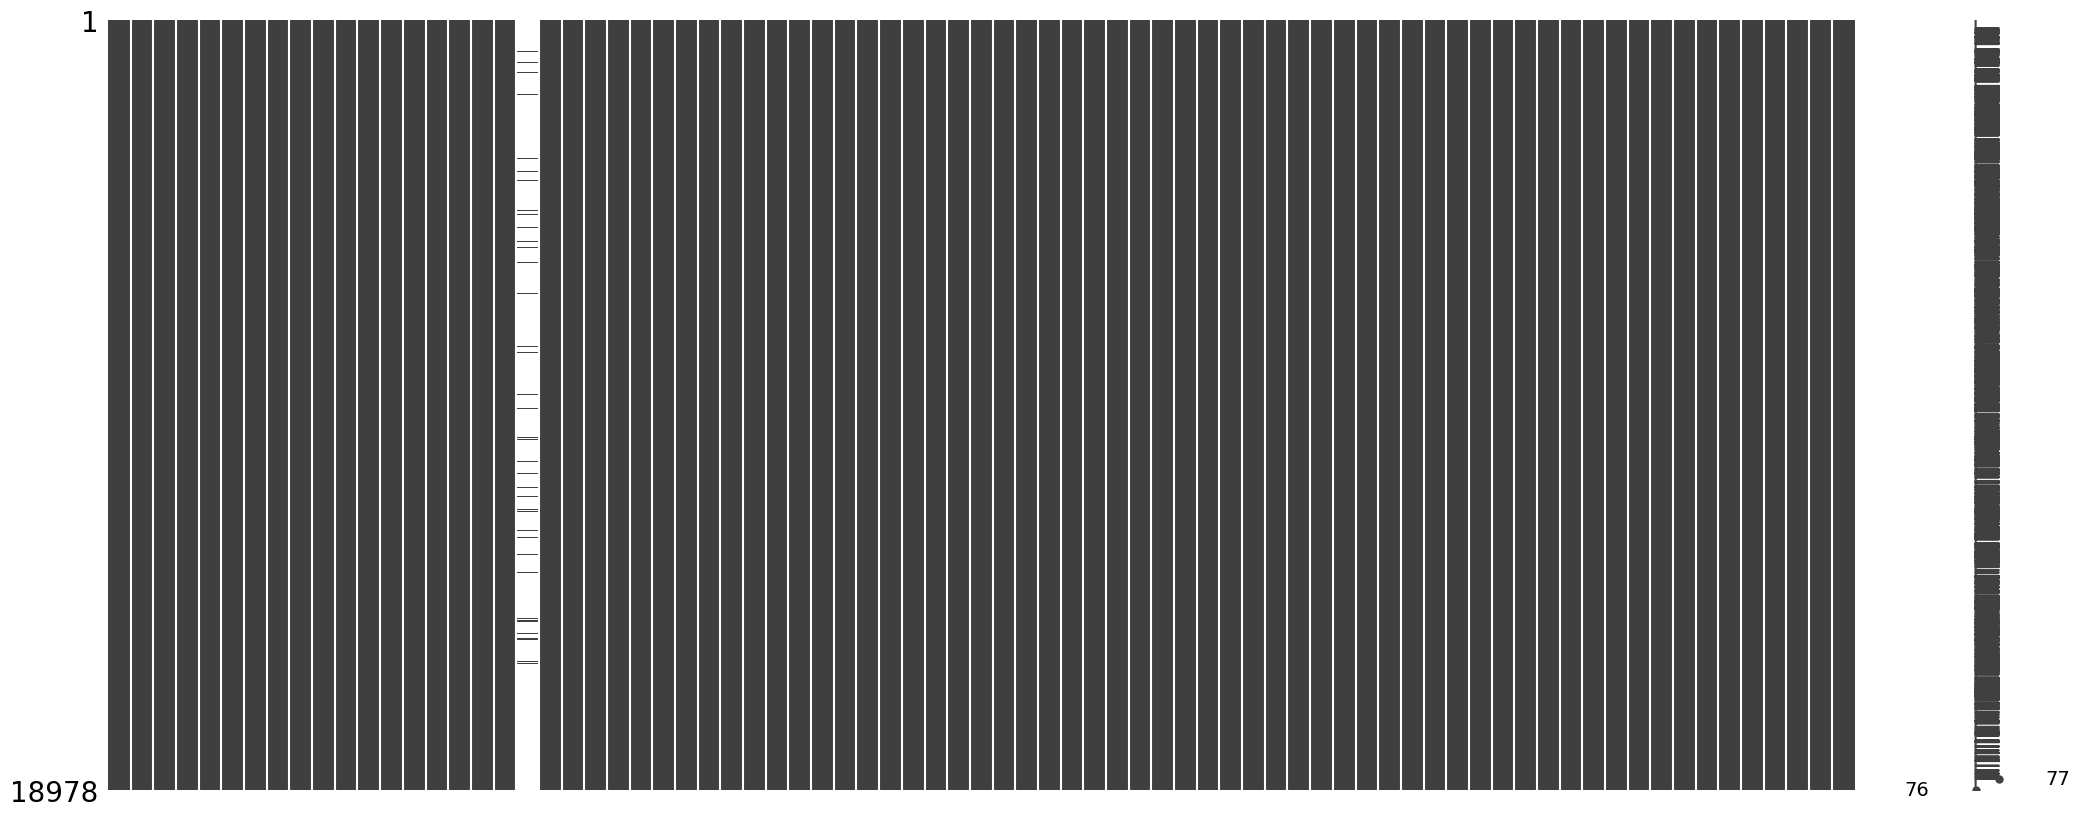

In [6]:
# Lets visualize null values
msno.matrix(df)

<Axes: >

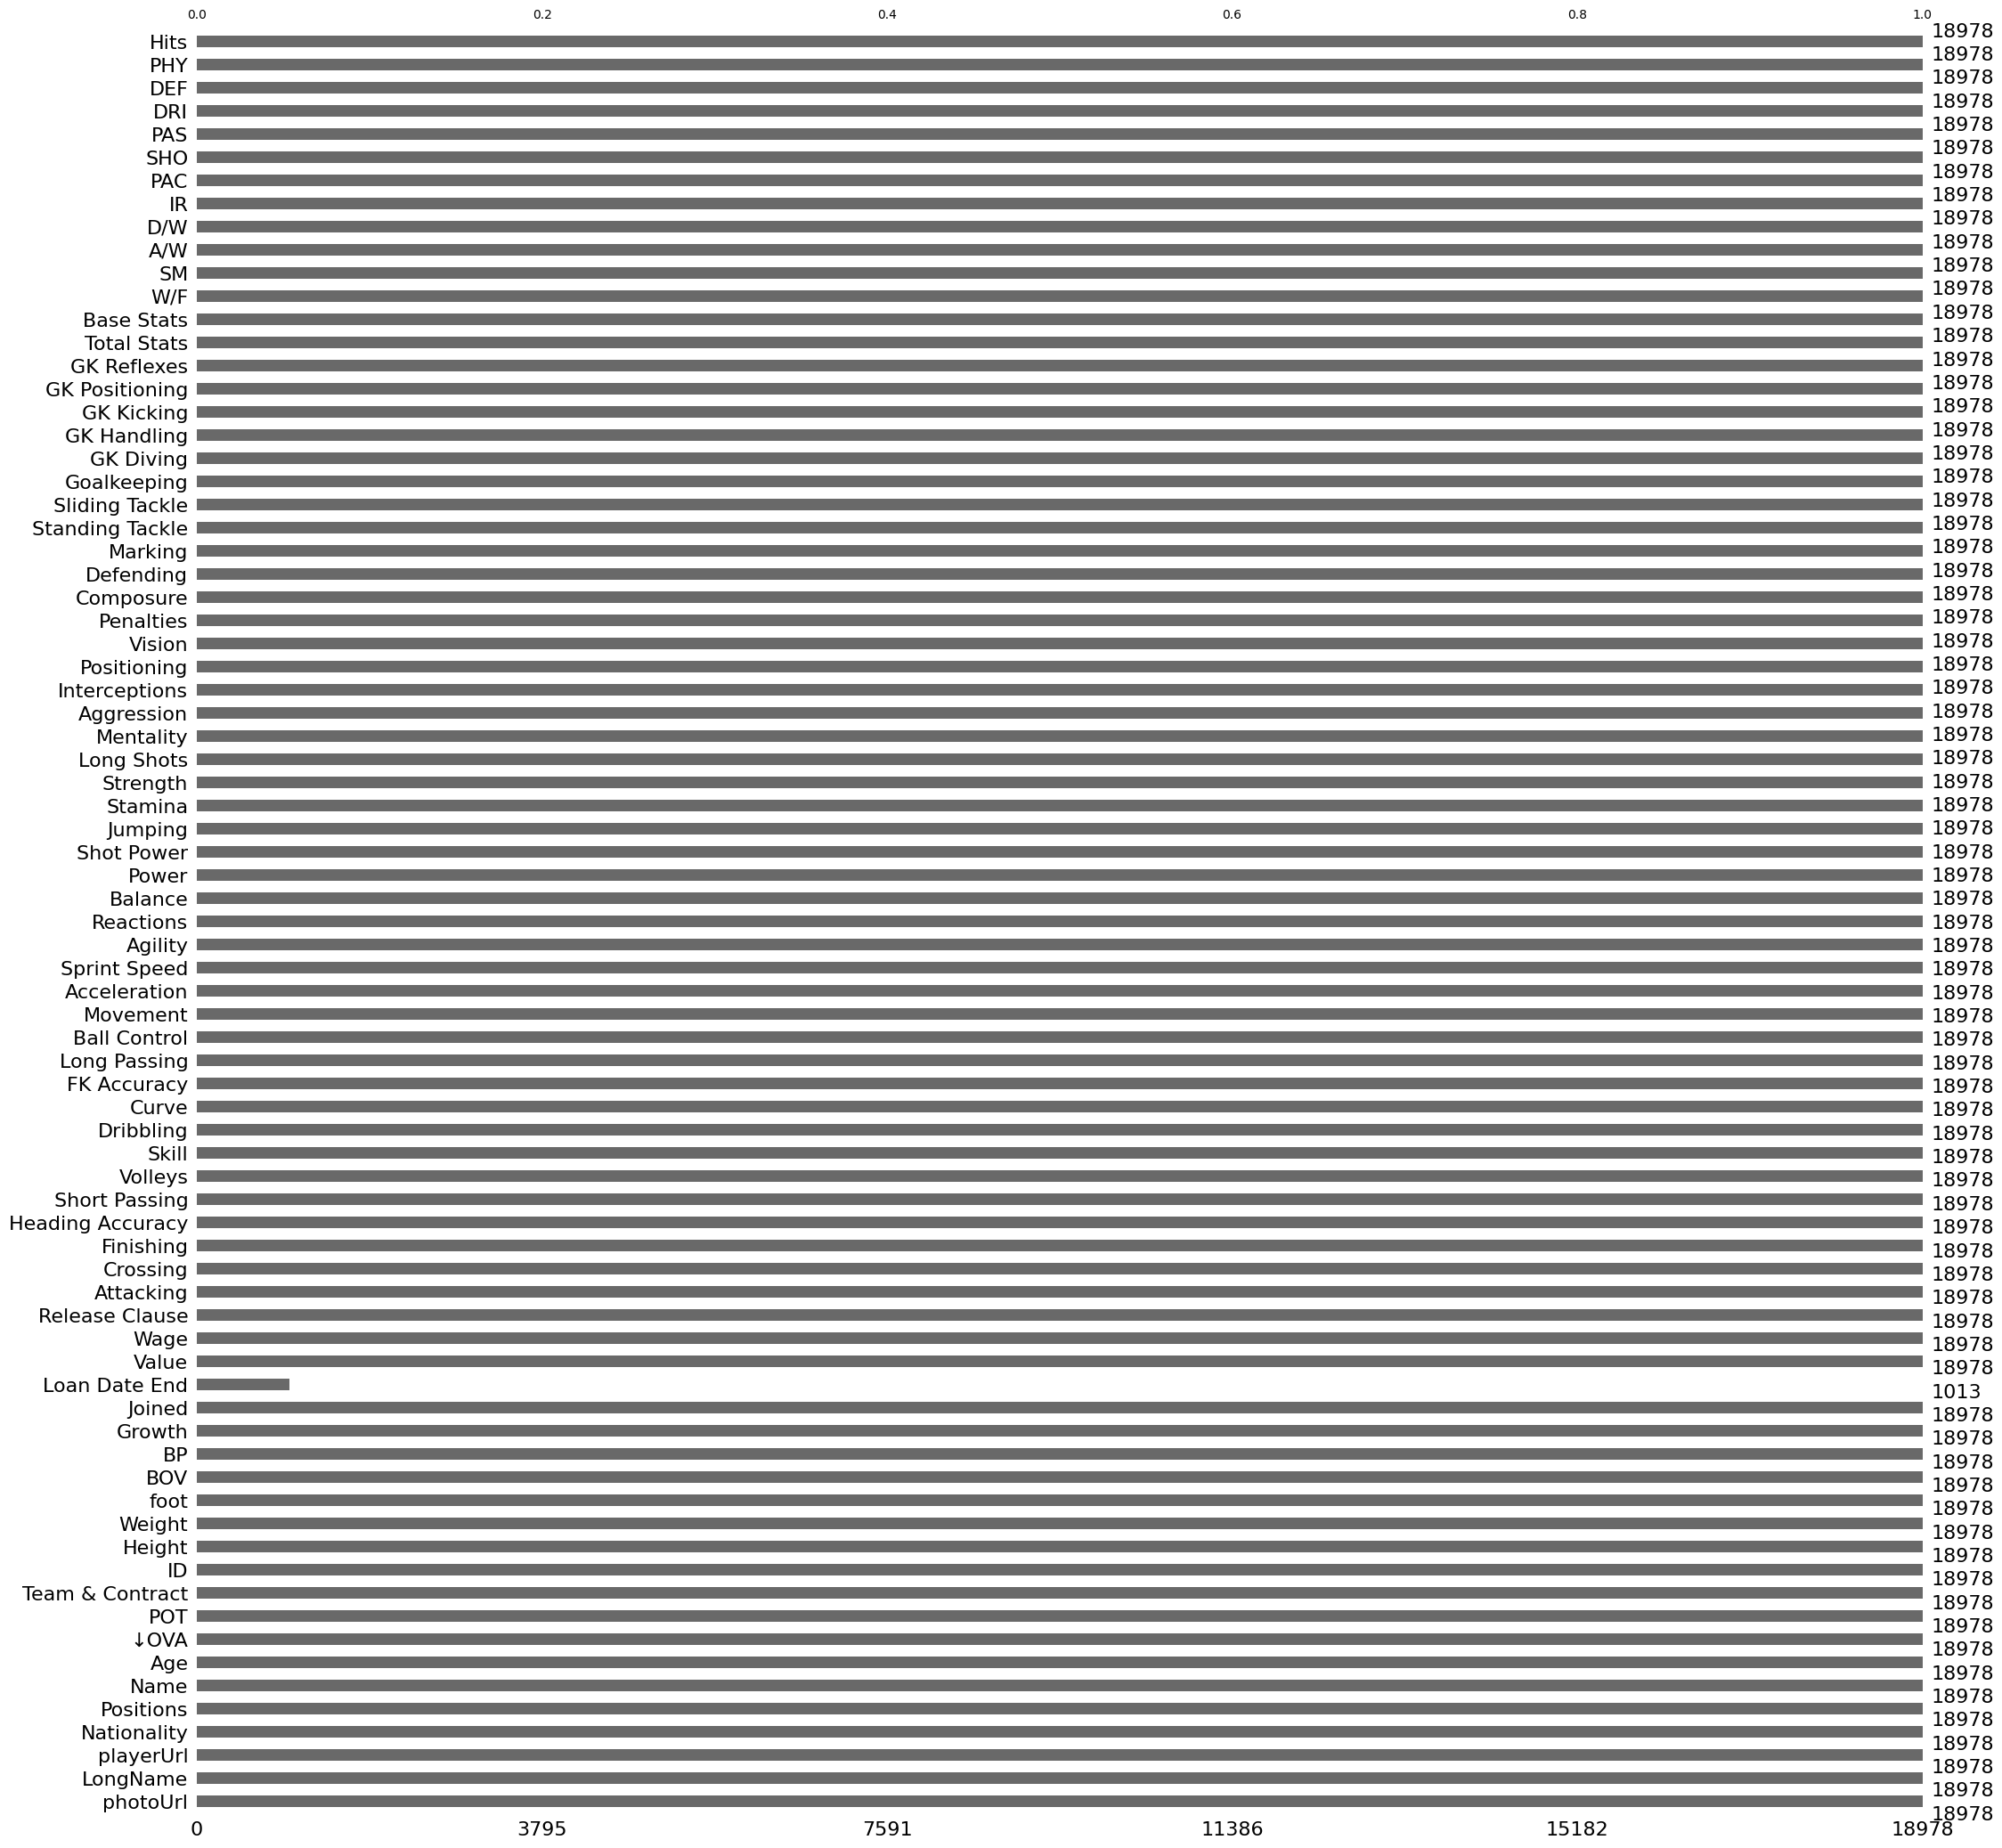

In [7]:
msno.bar(df)

<Axes: >

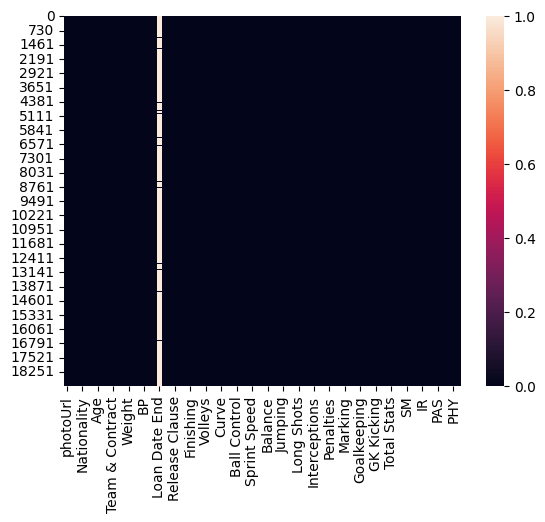

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.head(5)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [10]:
df.drop(['photoUrl', 'playerUrl'], axis=1, inplace=True)

In [11]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [12]:
df["Team & Contract"] = df["Team & Contract"].str.replace("\n", "")
df["Team & Contract"] = df["Team & Contract"].str.strip()

In [13]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [14]:
df["Hits"] = df["Hits"].str.replace("\n", "")

In [15]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,273


In [16]:
df["W/F"] = df["W/F"].str.replace('[^0-5]', '', regex=True)

In [17]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4★,Medium,Low,5 ★,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5★,High,Low,5 ★,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1★,Medium,Medium,3 ★,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4★,High,High,4 ★,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5★,High,Medium,5 ★,91,85,86,94,36,59,273


In [18]:
df["SM"] = df["SM"].str.replace("★", '')

In [19]:
df["SM"].count() # counts all the non null value

18978

In [20]:
df["SM"].value_counts() # count all the unique values

SM
2    9142
3    6576
1    2075
4    1130
5      55
Name: count, dtype: int64

In [21]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5 ★,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5 ★,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3 ★,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4 ★,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5 ★,91,85,86,94,36,59,273


In [22]:
df["IR"].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [23]:
df["IR"] = df["IR"].str.replace('[^1-5]', '', regex=True)

In [24]:
df.head()

,LongName,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273


In [25]:
df.rename(columns={"↓OVA": "Overall Rating"}, inplace=True)

In [26]:
df.head()

,LongName,Nationality,Positions,Name,Age,Overall Rating,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273


In [27]:
df["Overall Rating"].unique()

array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47])

In [28]:
df["Overall Rating"].min()

47

In [29]:
df[df["Overall Rating"] == 47]

,LongName,Nationality,Positions,Name,Age,Overall Rating,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18965,Zhen'ao Wang,China PR,RW,Wang Zhen'ao,20,47,57,Dalian YiFang FC2020 ~ 2022,243790,"5'9""",152lbs,Right,48,ST,10,"Sep 22, 2020",NaN,€50K,€2K,€88K,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,12
18966,Ronan McKinley,England,CM,R. McKinley,18,47,65,Derry City2019 ~ 2020,252757,"5'10""",163lbs,Right,49,CAM,18,"Mar 8, 2019",NaN,€60K,€500,€131K,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,5
18967,Xiao Zhou,China PR,CB LB,Zhou Xiao,21,47,57,Dalian YiFang FC2019 ~ 2023,252520,"6'2""",165lbs,Left,50,LB,10,"Jul 29, 2019",NaN,€45K,€2K,€79K,163,40,18,40,45,20,171,40,33,20,40,38,279,60,63,57,47,52,231,37,66,60,55,13,185,45,47,33,33,27,33,136,45,46,45,50,10,11,7,10,12,1215,265,3,2,Medium,Medium,1,62,22,39,42,45,55,3
18968,Zhenghao Wang,China PR,CB,Wang Zhenghao,20,47,51,Tianjin TEDA FC2019 ~ 2022,250989,"6'1""",163lbs,Right,49,CB,4,"Feb 1, 2019",NaN,€35K,€1K,€57K,148,20,20,46,40,22,135,35,20,25,25,30,245,54,49,40,45,57,239,35,69,58,55,22,176,46,45,25,25,35,40,136,36,55,45,63,12,9,14,15,13,1142,241,2,2,Low,Medium,1,51,25,29,36,45,55,15
18969,Jiyu Zhong,China PR,CM,Zhong Jiyu,23,47,55,Shijiazhuang Ever Bright F.C.2018 ~ 2020,255626,"5'7""",137lbs,Right,49,CM,8,"Feb 9, 2018",NaN,€45K,€1K,€79K,201,39,30,42,56,34,211,40,39,39,53,40,314,61,65,56,46,86,247,52,64,59,36,36,214,50,38,45,46,35,43,122,38,39,45,51,5,13,7,13,13,1360,277,2,2,Medium,Low,1,63,37,48,44,39,46,4
18970,Wenzhuo Huang,China PR,CM,Huang Wenzhou,21,47,53,Shanghai SIPG FC2020 ~ 2022,257933,"5'9""",150lbs,Right,50,CDM,6,"Aug 1, 2020",NaN,€40K,€1K,€72K,193,38,30,42,55,28,212,45,36,36,50,45,291,56,60,50,50,75,211,38,53,48,43,29,220,58,42,32,53,35,35,138,43,42,53,53,8,8,13,14,10,1318,277,2,2,Low,Low,1,58,32,49,47,43,48,2
18971,Yue Song,China PR,CM,Song Yue,28,47,47,Tianjin TEDA FC2020 ~ 2022,257936,"6'1""",174lbs,Right,49,RM,0,"Aug 1, 2020",NaN,€30K,€2K,€47K,211,44,32,44,56,35,215,46,37,33,56,43,286,67,64,56,44,55,258,49,59,54,62,34,220,57,35,48,44,36,35,126,38,43,45,36,8,5,11,5,7,1352,296,2,2,Low,Low,1,65,37,49,46,40,59,8
18972,Huapeng Wang,China PR,CB,Wang Huapeng,20,47,53,Guangzhou R&F FC2020 ~ 2022,257689,"5'11""",170lbs,Right,49,CB,6,"Aug 1, 2020",NaN,€35K,€1K,€61K,134,22,18,46,24,24,123,23,27,21,24,28,268,61,57,48,41,61,233,32,68,60,58,15,176,40,44,24,33,35,37,148,41,52,55,58,10,15,12,8,13,1140,238,2,2,Low,Low,1,59,22,25,30,47,55,2
18973,Zitong Chen,China PR,CM,Chen Zitong,23,47,51,Shijiazhuang Ever Bright F.C.2020 ~ 2023,257697,"6'1""",176lbs,Right,51,CDM,4,"Aug 1, 2020",NaN,€40K,€1K,€65K,203,38,32,45,56,32,217,45,35,35,54,48,285,62,60,59,51,53,245,45,56,48,63,33,214,56,40,31,45,42,43,135,41,49,45,47,15,7,7,5,13,1346,294,2,2,Low,Low,1,61,35,48,48,44,58,2
18974,Mengxuan Zhang,China PR,CB,Zhang Mengxuan,21,47,52,Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020,257710,"5'10""",154lbs,Right,49,CB,5,"Aug 1, 2020",NaN,€35K,€1K,€57K,141,23,16,45,31,26,111,19,21,22,25,24,279,60,56,45,48,70,223,35,65,55,45,23,179,44,50,25,25,35,40,148,45,56,47,53,12,13,8,14,6,1134,232,2,2,Low,Low,1,58,23,26,27,50,48,2


In [30]:
df.columns.tolist()

['LongName',
 'Nationality',
 'Positions',
 'Name',
 'Age',
 'Overall Rating',
 'POT',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'BOV',
 'BP',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [31]:
df.columns = new_column_names = [
    'Full Name',
    'Nationality',
    'Positions',
    'Common Name',
    'Age',
    'Overall Rating',
    'Potential',
    'Team and Contract',
    'Player ID',
    'Height',
    'Weight',
    'Preferred Foot',
    'Best Overall Position',
    'Best Position',
    'Growth',
    'Joined Club',
    'Loan End Date',
    'Market Value',
    'Weekly Wage',
    'Release Clause',
    'Attacking Work Rate',
    'Crossing',
    'Finishing',
    'Heading Accuracy',
    'Short Passing',
    'Volleys',
    'Skill Moves',
    'Dribbling',
    'Curve',
    'Free Kick Accuracy',
    'Long Passing',
    'Ball Control',
    'Movement Style',
    'Acceleration',
    'Sprint Speed',
    'Agility',
    'Reactions',
    'Balance',
    'Physical Power',
    'Shot Power',
    'Jumping',
    'Stamina',
    'Strength',
    'Long Shots',
    'Mentality',
    'Aggression',
    'Interceptions',
    'Positioning',
    'Vision',
    'Penalties',
    'Composure',
    'Defensive Work Rate',
    'Marking',
    'Standing Tackle',
    'Sliding Tackle',
    'Goalkeeping',
    'Diving',
    'Handling',
    'Kicking',
    'Positioning',
    'Reflexes',
    'Total Stats',
    'Base Stats',
    'Weak Foot Rating',
    'Skill Moves Rating',
    'Attack Work Rate',
    'Defense Work Rate',
    'International Reputation',
    'Pace',
    'Shooting',
    'Passing',
    'Dribbling',
    'Defending',
    'Physical',
    'Hit Count'
]

In [32]:
df.head()

,Full Name,Nationality,Positions,Common Name,Age,Overall Rating,Potential,Team and Contract,Player ID,Height,Weight,Preferred Foot,Best Overall Position,Best Position,Growth,Joined Club,Loan End Date,Market Value,Weekly Wage,Release Clause,Attacking Work Rate,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill Moves,Dribbling,Curve,Free Kick Accuracy,Long Passing,Ball Control,Movement Style,Acceleration,Sprint Speed,Agility,Reactions,Balance,Physical Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive Work Rate,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Diving,Handling,Kicking,Positioning,Reflexes,Total Stats,Base Stats,Weak Foot Rating,Skill Moves Rating,Attack Work Rate,Defense Work Rate,International Reputation,Pace,Shooting,Passing,Dribbling,Defending,Physical,Hit Count
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273


In [33]:
df["Overall Rating"].unique()

array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47])

In [34]:
minimum_index = df['Overall Rating'].idxmin()

In [35]:
df.loc[minimum_index]

Full Name      Zhen'ao Wang
Nationality        China PR
Positions                RW
Common Name    Wang Zhen'ao
Age                      20
                   ...     
Passing                  41
Dribbling                49
Defending                30
Physical                 44
Hit Count                12
Name: 18965, Length: 75, dtype: object

In [36]:
df["Age"].unique()

array([33, 35, 27, 29, 28, 31, 21, 34, 32, 25, 26, 30, 20, 24, 22, 23, 19,
       38, 42, 37, 36, 18, 39, 17, 40, 41, 16, 43, 53])

<Axes: ylabel='Age'>

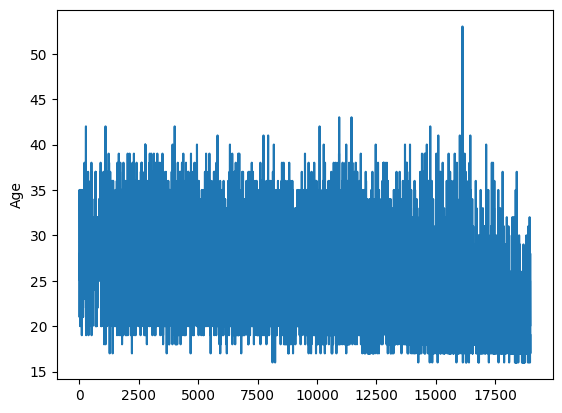

In [37]:
sns.lineplot(x=range(len(df['Age'])), y=df['Age'])

In [38]:
df["Attack Work Rate"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [39]:
df[df["Attack Work Rate"] == "High"]

,Full Name,Nationality,Positions,Common Name,Age,Overall Rating,Potential,Team and Contract,Player ID,Height,Weight,Preferred Foot,Best Overall Position,Best Position,Growth,Joined Club,Loan End Date,Market Value,Weekly Wage,Release Clause,Attacking Work Rate,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill Moves,Dribbling,Curve,Free Kick Accuracy,Long Passing,Ball Control,Movement Style,Acceleration,Sprint Speed,Agility,Reactions,Balance,Physical Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive Work Rate,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Diving,Handling,Kicking,Positioning,Reflexes,Total Stats,Base Stats,Weak Foot Rating,Skill Moves Rating,Attack Work Rate,Defense Work Rate,International Reputation,Pace,Shooting,Passing,Dribbling,Defending,Physical,Hit Count
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273
5,Robert Lewandowski,Poland,ST,R. Lewandowski,31,91,91,FC Bayern München2014 ~ 2023,188545,"6'0""",176lbs,Right,91,ST,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,182
6,Kylian Mbappé,France,ST LW RW,K. Mbappé,21,90,95,Paris Saint-Germain2018 ~ 2022,231747,"5'10""",161lbs,Right,91,ST,5,"Jul 1, 2018",NaN,€105.5M,€160K,€203.1M,408,78,91,73,83,83,394,92,79,63,70,90,458,96,96,92,92,82,404,86,77,86,76,79,341,62,38,91,80,70,84,100,34,34,32,42,13,5,7,11,6,2147,466,4,5,High,Low,3,96,86,78,91,39,76,646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18893,Xiang Gao,China PR,RW,Gao Xiang,31,49,49,Qingdao Huanghai F.C.2015 ~ 2021,255618,"5'9""",139lbs,Right,49,RW,0,"Feb 13, 2015",NaN,€25K,€2K,€39K,221,40,55,38,43,45,212,55,38,37,37,45,305,67,62,54,38,84,212,64,38,36,34,40,185,31,21,45,42,46,42,62,18,24,20,49,13,5,12,7,12,1246,267,2,2,High,Low,1,64,52,41,53,23,34,2
18896,Yifeng Zang,China PR,LW,Zang Yifeng,26,49,50,Shijiazhuang Ever Bright F.C.2019 ~ 2020,222345,"5'6""",132lbs,Left,52,CAM,1,"Feb 22, 2019",NaN,€35K,€2K,€57K,214,41,45,34,48,46,252,49,44,64,43,52,245,48,55,63,38,41,196,54,35,34,33,40,228,38,19,57,61,53,65,86,37,26,23,56,15,14,7,12,8,1277,260,3,2,High,Low,1,52,47,49,50,28,34,3
18906,Michael Harris,Republic of Ireland,RW LW RM,M. Harris,17,49,62,Derry City2020 ~ 2020,256415,"6'0""",154lbs,Right,50,CAM,13,"Jan 1, 2020",NaN,€50K,€500,€109K,216,48,49,42,46,31,221,48,50,35,42,46,278,57,54,59,47,61,248,49,60,50,42,47,207,34,25,48,46,54,42,83,25,32,26,36,6,8,7,8,7,1289,269,3,2,High,Medium,1,55,48,45,49,29,43,4
18915,Maxim Gresler,Germany,LB,M. Gresler,17,49,67,TSV 1860 München2020 ~ 2023,258001,"5'10""",157lbs,Left,49,LB,18,"Feb 29, 2020",NaN,€50K,€500,€104K,1

In [40]:
df["Weight"].unique()

array(['159lbs', '183lbs', '192lbs', '154lbs', '150lbs', '176lbs',
       '161lbs', '201lbs', '157lbs', '152lbs', '203lbs', '187lbs',
       '185lbs', '212lbs', '179lbs', '181lbs', '165lbs', '190lbs',
       '196lbs', '163lbs', '168lbs', '141lbs', '172lbs', '198lbs',
       '146lbs', '132lbs', '207lbs', '174lbs', '148lbs', '143lbs',
       '130lbs', '134lbs', '194lbs', '205lbs', '214lbs', '170lbs',
       '137lbs', '139lbs', '209lbs', '220lbs', '128lbs', '216lbs',
       '227lbs', '218lbs', '123lbs', '225lbs', '223lbs', '126lbs',
       '121lbs', '229lbs', '236lbs', '243lbs', '117lbs', '110lbs',
       '119lbs', '115lbs'], dtype=object)

In [41]:
df["Weight"] = df["Weight"].apply(lambda x: f'{x[0:3]} {x[3:6]}')

In [42]:
df.head()

,Full Name,Nationality,Positions,Common Name,Age,Overall Rating,Potential,Team and Contract,Player ID,Height,Weight,Preferred Foot,Best Overall Position,Best Position,Growth,Joined Club,Loan End Date,Market Value,Weekly Wage,Release Clause,Attacking Work Rate,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill Moves,Dribbling,Curve,Free Kick Accuracy,Long Passing,Ball Control,Movement Style,Acceleration,Sprint Speed,Agility,Reactions,Balance,Physical Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive Work Rate,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Diving,Handling,Kicking,Positioning,Reflexes,Total Stats,Base Stats,Weak Foot Rating,Skill Moves Rating,Attack Work Rate,Defense Work Rate,International Reputation,Pace,Shooting,Passing,Dribbling,Defending,Physical,Hit Count
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159 lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183 lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192 lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154 lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150 lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273


In [43]:
df.drop('Loan End Date', axis=1, inplace=True)

In [44]:
df.head()

,Full Name,Nationality,Positions,Common Name,Age,Overall Rating,Potential,Team and Contract,Player ID,Height,Weight,Preferred Foot,Best Overall Position,Best Position,Growth,Joined Club,Market Value,Weekly Wage,Release Clause,Attacking Work Rate,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill Moves,Dribbling,Curve,Free Kick Accuracy,Long Passing,Ball Control,Movement Style,Acceleration,Sprint Speed,Agility,Reactions,Balance,Physical Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive Work Rate,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,Diving,Handling,Kicking,Positioning,Reflexes,Total Stats,Base Stats,Weak Foot Rating,Skill Moves Rating,Attack Work Rate,Defense Work Rate,International Reputation,Pace,Shooting,Passing,Dribbling,Defending,Physical,Hit Count
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,158023,"5'7""",159 lbs,Left,93,RW,0,"Jul 1, 2004",€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,20801,"6'2""",183 lbs,Right,92,ST,0,"Jul 10, 2018",€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,200389,"6'2""",192 lbs,Right,91,GK,2,"Jul 16, 2014",€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,192985,"5'11""",154 lbs,Right,91,CAM,0,"Aug 30, 2015",€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,190871,"5'9""",150 lbs,Right,91,LW,0,"Aug 3, 2017",€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273
